In [44]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris['data']
features = iris['feature_names']
target = iris['target']
target_names = iris['target_names']

# map target labels to species names => Ground Truth
species = target_names[target]
print(species)

In [62]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(data)

# Determine the cluster labels of iris data: labels => Prediction
labels = model.predict(data)

# can also use: labels = model.fit_predict(data)

# Calculate inertia: Measures how spread out the clusters are (lower is be!er) 
print(model.inertia_)

78.85144142614601


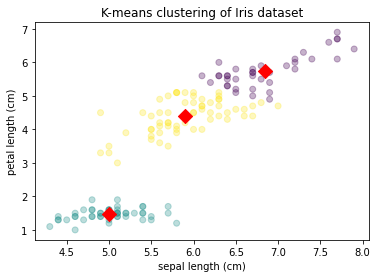

In [46]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = data[:,0]
ys = data[:,2]

fig, ax = plt.subplots()
# Make a scatter plot of xs and ys, using labels to define the colors
ax.scatter(xs, ys, c=labels, alpha=0.3)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]

# Make a scatter plot of centroids_x and centroids_y
ax.scatter(centroids_x, centroids_y, marker='D', s=100, color='r')
ax.set_title('K-means clustering of Iris dataset')
ax.set_xlabel(features[0])
ax.set_ylabel(features[2])
plt.show()


### Compare ground truth to prediction

In [54]:
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})

In [55]:
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          48         14
1            50           0          0
2             0           2         36


### What is the best clusters to choose?
The elbow rule, the point where the decrease slows down  
See below, **3 is a good choice**

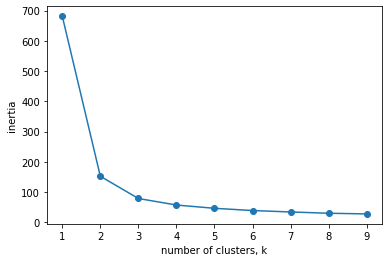

In [61]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(data)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## Pipelines with Kmeans and StandardScaller

### Standard scaller
- in kmeans: feature variance = feature influence
- `StandardScaller` transforms each feature to have mean 0 and variance 1

In [81]:
import pandas as pd
df = pd.read_csv('fish.csv', header=None) # prevent first row from becoming header
samples = df.iloc[:,1:].to_numpy()
species = df.iloc[:,0].to_numpy()

In [82]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [83]:
# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            1     0     19      1
2            0    17      0      0
3            0     0      0     13


### Full pipeline with stocks

In [3]:
import pandas as pd
df = pd.read_csv('stock.csv')
df.head()
movements = df.iloc[:,1:].to_numpy()
companies = df.iloc[:,0].to_numpy()

In [4]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [5]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
42       0                   Royal Dutch Shell
52       0                            Unilever
53       0                       Valero Energy
23       0                                 IBM
49       0                               Total
47       0                            Symantec
13       0                   DuPont de Nemours
12       0                             Chevron
46       0                      Sanofi-Aventis
19       0                     GlaxoSmithKline
10       0                      ConocoPhillips
8        0                         Caterpillar
35       0                            Navistar
6        0            British American Tobacco
37       0                            Novartis
44       0                        Schlumberger
57       0                               Exxon
39       0                              Pfizer
32       0                                  3M
43       0                                 SAP
36       1   